In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import newplot

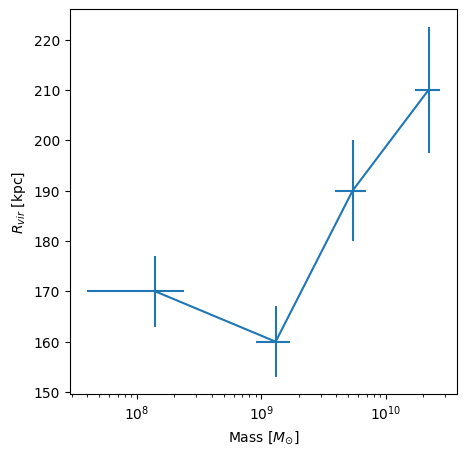

In [2]:
plt.style.use('default')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

M = np.array([1.4e8,1.3e9,5.4e9,2.2e10]) 
M_err = np.array([0.2e9,0.8e9,3e9,1e10])/2
R = np.array([170.0,160.0,190,210])
R_err = np.array([14,14,20,25])/2

plt.errorbar(M,R,yerr=R_err,xerr=M_err)

plt.xlabel('Mass [$M_{\odot}$]')
plt.ylabel('$R_{vir}$ [kpc]')
plt.xscale('log')


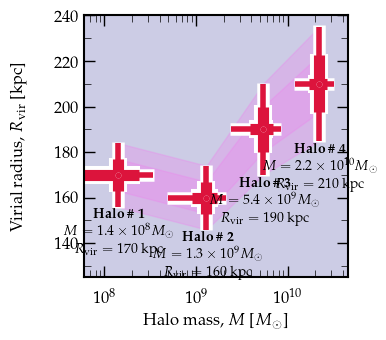

In [4]:
fig, ax = newplot("column")

# Plot errorbars and add galaxy image
# PointsAsImages(ax,M, R, 'images/galaxy.png', zoom=0.3)
ax.errorbar(M, R,xerr=2.05*M_err,yerr=2.05*R_err,fmt='.',elinewidth=4+5,color='w')
ax.errorbar(M, R,xerr=1.05*M_err,yerr=1.05*R_err,fmt='.',elinewidth=8+5,color='w')
ax.errorbar(M, R,xerr=2*M_err,yerr=2*R_err,fmt='.',elinewidth=4,color='crimson')
ax.errorbar(M, R,xerr=M_err,yerr=R_err,fmt='.',elinewidth=8,color='crimson')

# Region connecting the points
ax.fill_between(M, R+R_err,y2=R-R_err,color='violet',alpha=0.3)
ax.fill_between(M, R+2*R_err,y2=R-2*R_err,color='violet',alpha=0.3)

# Loop over text labels
for i,m,r,dr in zip(range(4),M,R,R_err):
    Mord = np.floor(np.log10(m))
    Mdec = m/10**Mord  
    plt.text(m,r-dr*2.1,r'\begin{center} {\bf Halo \# %.1d} \linebreak $M =  %.1f \times 10^{%.0f} M_\odot$ \linebreak $R_{\rm vir} = $ %.0f kpc \end{center}'%(i+1,Mdec,Mord,r),fontsize=10,ha='center',va='top')

plt.xlabel(r'Halo mass, $M$ [$M_{\odot}$]')
plt.ylabel(r'Virial radius, $R_{\rm vir}$ [kpc]',labelpad=20)

plt.xscale('log')
plt.ylim([125,240])
plt.xlim(left=0.6e8)

# Fill axis with a colour
ax.patch.set_facecolor('navy')
ax.patch.set_alpha(0.2)

from matplotlib.ticker import MultipleLocator
ax.yaxis.set_minor_locator(MultipleLocator(10))

ax.tick_params(axis='x', which='major', pad=10)

plt.savefig('test.pdf',bbox_inches='tight')